# Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from sklearn import metrics

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Read the input file

In [5]:
data=pd.read_csv("C://Suresha/Reva/Trimester 1/Python/RP_class/29June2019/Telco.csv", sep=',')

In [6]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# understand the features , missing values,type of characters,percentile, mean, std, Quartiles, min, max

In [7]:
data.head()
data.tail()
data.info()
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Exploratory data analytics

In [8]:
eda_report=pandas_profiling.ProfileReport(data)
eda_report.to_file("Telco_EDA_report.html")

In [9]:
pwd()

'C:\\Users\\hpsur'

In [10]:
data.shape
type(data)
data.size
data.head()
data.tail()

(7043, 20)

pandas.core.frame.DataFrame

140860

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [11]:
pd.isnull(data).any()
pd.isnull(data).sum()
data.info()
data.describe()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [21]:
print('Counts of Labels')
data.groupby("Churn").size()

Counts of Labels


Churn
0    5174
1    1869
dtype: int64

In [22]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col]=pd.Categorical(data[col]).codes

In [12]:
data.head()
data.info()
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int8
SeniorCitizen       7043 non-null float64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null float64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null int16
Churn               7043 non-null int8
dtypes: float64(3), int16(1), int8(16)
memory usage: 289.0 KB


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


# Exploratory data anlaysis report

In [14]:
eda_report=pandas_profiling.ProfileReport(data)
eda_report.to_file("Telco_EDA_report.html")

# Correlation matrix, Heat map

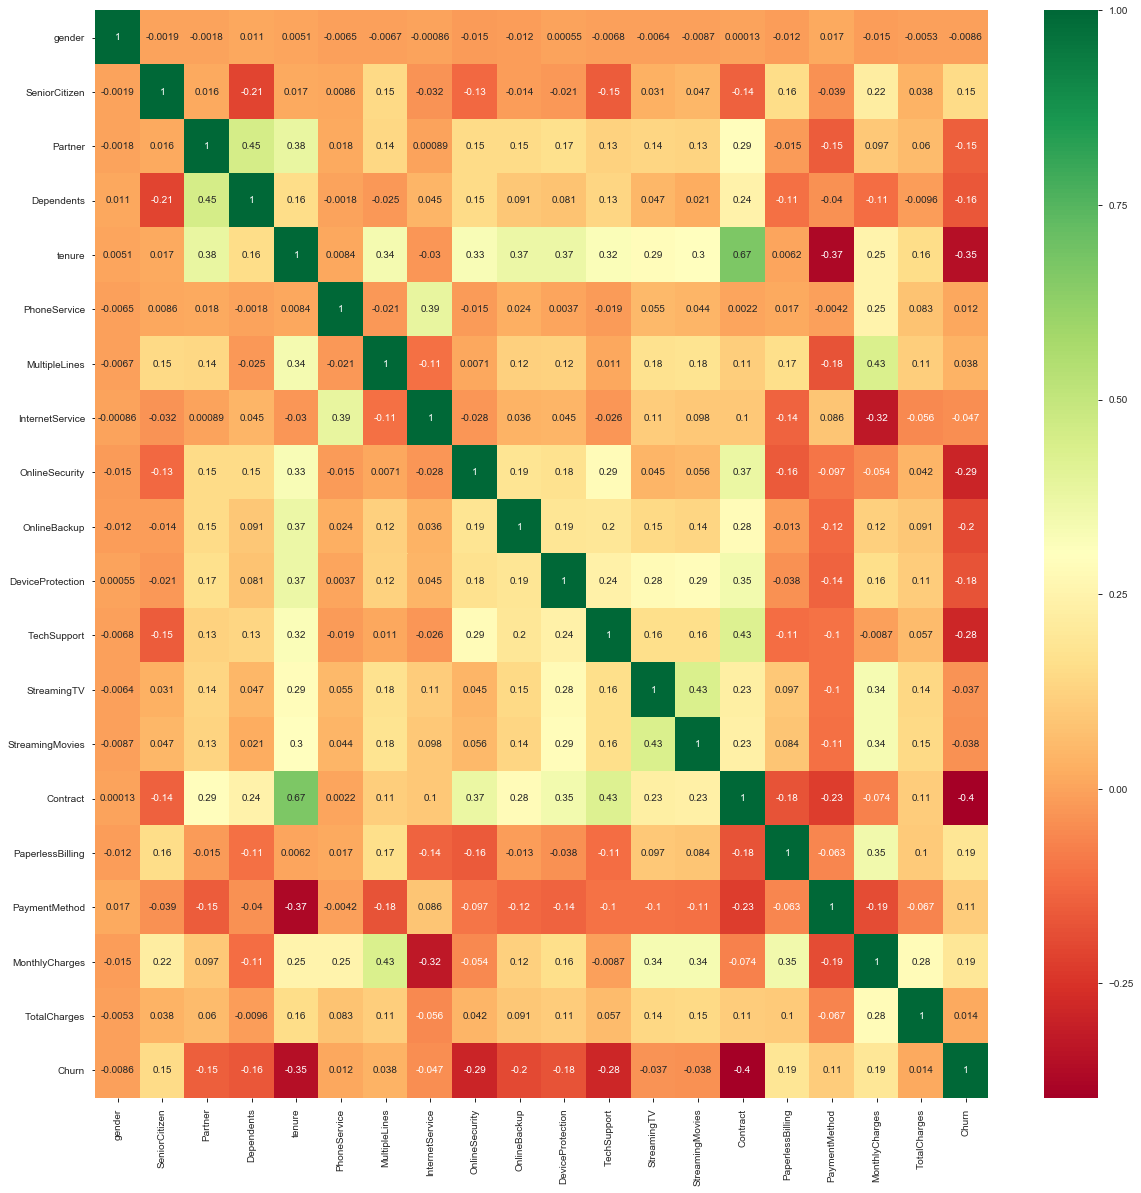

In [15]:
x=data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

# segregate data X and Y 

In [16]:
y=data.Churn
x=data.drop('Churn',axis=1)
y.head()
x.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


# Split  train 70% and test 30%

In [17]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.05,random_state=1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(6690, 19)

(6690,)

(353, 19)

(353,)

In [18]:
import random
random.seed(1234)

# Build Logistic Regression model

In [19]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
log.coef_

array([[-2.71089564e-02,  1.98043547e-01,  1.49610749e-02,
        -1.54126878e-01, -3.50773963e-02, -9.79677977e-01,
         7.72524333e-02,  2.46301183e-01, -2.68330847e-01,
        -1.15378406e-01, -7.42045799e-02, -2.42087748e-01,
         2.48591503e-03,  2.06042505e-02, -7.03714524e-01,
         3.13894523e-01,  4.19901001e-02,  2.71940603e-02,
         5.35047852e-05]])

# Define classes postive and negative cases

In [24]:
classes =log.predict(test_x)
print(classes.size)
print('Positive cases in Test data:', test_y[test_y==1].shape[0])
print('Negative cases in Test data:', test_y[test_y==0].shape[0])

353
Positive cases in Test data: 86
Negative cases in Test data: 267


# Coefficinents

In [25]:
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values('Variable',ascending=True)

,Variable,Coeff
14,Contract,-0.703715
3,Dependents,-0.154127
10,DeviceProtection,-0.074205
7,InternetService,0.246301
17,MonthlyCharges,0.027194
6,MultipleLines,0.077252
9,OnlineBackup,-0.115378
8,OnlineSecurity,-0.268331
15,PaperlessBilling,0.313895
2,Partner,0.014961


# Accuracy and Precision and Area Under the Curve (AUC)

In [26]:
print ('Accuracy Score')
print (metrics.accuracy_score(test_y,classes))
print ('Precision/Recall Metrics')
print (metrics.classification_report(test_y,classes))
print ('AUC')
auc = metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.8385269121813032
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       267
           1       0.68      0.63      0.65        86

   micro avg       0.84      0.84      0.84       353
   macro avg       0.78      0.77      0.77       353
weighted avg       0.83      0.84      0.84       353

AUC


0.767137008971344

# Plot ROCR Chart and AUC value

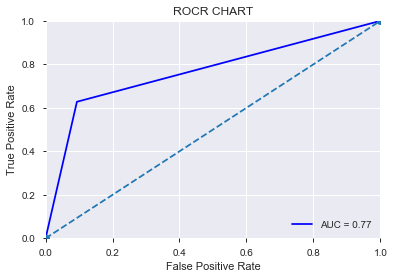

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

# Plot confusion matrix

confusion Matrix


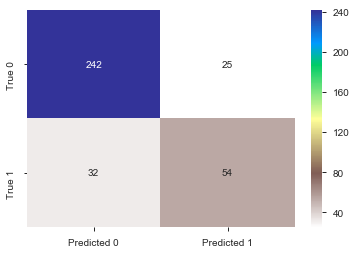

In [28]:
print('confusion Matrix')
cf = metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap ="terrain_r", fmt="d", xticklabels=lbl1,yticklabels=lbl2)
plt.show()

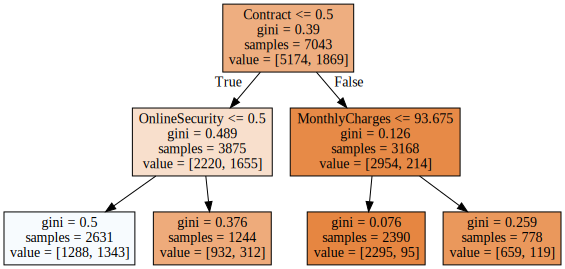

In [29]:
import graphviz
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(x,y)
with open('tree.dot','w') as dotfile:
    tree.export_graphviz(clf,out_file=dotfile,feature_names=x.columns,filled=True)
    dotfile.close()
    
from graphviz import Source
with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(max_depth=8)
my_tree_one
my_tree_one = my_tree_one.fit(x_train, y_train)
predicted = my_tree_one.predict(x_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
metrics.accuracy_score(predicted, y_train)

0.8280085197018104

# Hyper parameter - Random Forest

In [56]:
n_estimators = [10,500,1000,2000]
criterion = ['gini', 'entropy']
min_samples_split = [2, 10, 20, 50, 100]
max_depth = [20, 30, 40, 50, None]

In [45]:
from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(max_depth=10)
my_tree_one

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
my_tree_one = my_tree_one.fit(train_x, train_y)

In [53]:
predicted = my_tree_one.predict(test_x)

In [55]:
metrics.accuracy_score(predicted, test_y)

0.7988668555240793

In [40]:
print(metrics.classification_report(predicted, test_y))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       296
           1       0.42      0.63      0.50        57

   micro avg       0.80      0.80      0.80       353
   macro avg       0.67      0.73      0.69       353
weighted avg       0.84      0.80      0.81       353



<Figure size 576x288 with 0 Axes>

Confusion Matrix


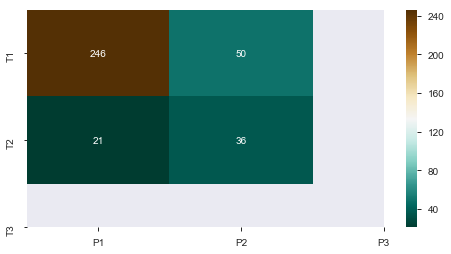

In [41]:
plt.figure(figsize=(8,4))
print('Confusion Matrix')
cf = metrics.confusion_matrix(predicted, test_y)
lbl1=["P1", "P2", "P3"]
lbl2 = ["T1", "T2", "T3"]
sns.heatmap(cf,annot=True,cmap ="BrBG_r", fmt="d", xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [42]:
my_tree_one.feature_importances_
x.columns
features = pd.DataFrame(my_tree_one.feature_importances_,x.columns)
features
features.columns = ["Importance"]
features

array([0.00000000e+00, 3.01393791e-04, 0.00000000e+00, 0.00000000e+00,
       1.29698843e-01, 0.00000000e+00, 0.00000000e+00, 9.24598183e-02,
       1.39473921e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.80634052e-03, 5.90150554e-01, 0.00000000e+00,
       0.00000000e+00, 4.31091296e-02, 0.00000000e+00])

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

,0
gender,0.000000
SeniorCitizen,0.000301
Partner,0.000000
Dependents,0.000000
tenure,0.129699
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.092460
OnlineSecurity,0.139474
OnlineBackup,0.000000


,Importance
gender,0.000000
SeniorCitizen,0.000301
Partner,0.000000
Dependents,0.000000
tenure,0.129699
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.092460
OnlineSecurity,0.139474
OnlineBackup,0.000000


0.7988668555240793

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       256
           1       0.65      0.58      0.61        97

   micro avg       0.80      0.80      0.80       353
   macro avg       0.75      0.73      0.74       353
weighted avg       0.79      0.80      0.79       353



<Figure size 576x288 with 0 Axes>

confusion Matrix


AttributeError: Unknown property xticktables

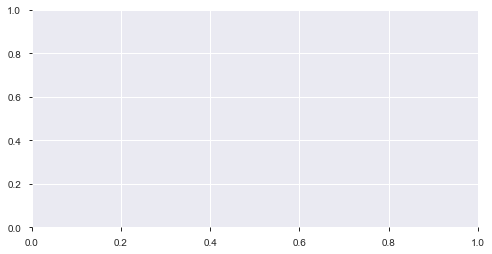

In [62]:
predicted=my_tree_one.predict(test_x)
metrics.accuracy_score(predicted,test_y)
print(metrics.classification_report(predicted,test_y))
#confusion matrix
plt.figure(figsize=(8,4))
print("confusion Matrix")
cf=metrics.confusion_matrix(predicted,test_y)
lbl1=["P1","P2","P3"]
lbl2=["T1","T2","T3"]
sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",xticktables=lbl1,yticktables=lbl2)
plt.show()